# sprint18 データセット作成

サイズがバラバラなので、リサイズ

In [1]:
from PIL import Image
import glob
import numpy as np
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
import tensorflow as tf
from tensorflow import keras

Using TensorFlow backend.


In [16]:
for i in range(0, 5):
    filename = "dog_" + str(i) + ".jpg"
    img = Image.open("dog/" + filename)
    img_resize = img.resize((125, 100))
    img_resize.save("data/" + filename)

In [2]:
dirname = "data"

In [3]:
files = glob.glob(dirname + "/*.jpg")

In [4]:
image_list = np.zeros([10, 125, 100, 3])
count = 0
for imgfile in files:
        img = load_img(imgfile, target_size=(125, 100))    # 画像ファイルの読み込み
        image_list[count] = img_to_array(img) / 255         # 画像ファイルのnumpy化
        count += 1

In [5]:
image_list.shape

(10, 125, 100, 3)

In [6]:
files

['data/cat_1.jpg',
 'data/cat_0.jpg',
 'data/cat_2.jpg',
 'data/cat_3.jpg',
 'data/cat_4.jpg',
 'data/dog_4.jpg',
 'data/dog_0.jpg',
 'data/dog_1.jpg',
 'data/dog_3.jpg',
 'data/dog_2.jpg']

In [7]:
# cat=0 dog=1
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_one_hot = enc.fit_transform(y[:, np.newaxis])

In [27]:
K.clear_session()

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, 3, activation=tf.nn.relu, padding="same", input_shape=[125, 100, 3]))
model.add(tf.keras.layers.MaxPooling2D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 100, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 50, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 198400)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                12697664  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 12,699,586
Trainable params: 12,699,586
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss="categorical_crossentropy",
             optimizer="SGD",
             metrics=["accuracy"])
history = model.fit(image_list, y_one_hot,
                   batch_size=10,
                   epochs=50,
                   verbose=0)

In [33]:
score = model.evaluate(image_list, y_one_hot, verbose=0)
print('loss:', score[0])
print('accuracy:', score[1])

loss: 0.02284463681280613
accuracy: 1.0


## 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。


《データ拡張のためのライブラリ》


データ拡張にはalbumentationsなどがあります。

https://github.com/albu/albumentations

また、Kerasを使う場合はImageDataGeneratorも便利です。


《データ拡張の効果の調査》


データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。

In [4]:
import cv2
import matplotlib.pyplot as plt
import albumentations as albu

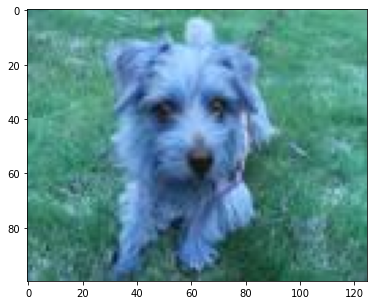

In [47]:
img = cv2.imread("data/dog_0.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_origin = img.copy()

plt.figure(figsize=(8, 5))
plt.imshow(img)

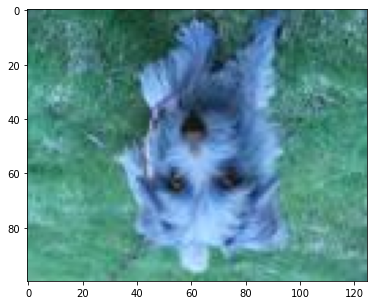

In [48]:
def get_augmentation():
    train_transform = [
        albu.HorizontalFlip(p=1),
        albu.VerticalFlip(p=1),
    ]
    return albu.Compose(train_transform)

transforms = get_augmentation()

img = img_origin.copy()
augmented = transforms(image=img)

img = augmented['image']
plt.figure(figsize=(8, 5))
plt.imshow(img);

In [5]:
from keras.preprocessing.image import*

In [57]:
# -90 - 90の範囲でランダムに回転
datagen = ImageDataGenerator(rotation_range=90)
 
# generatorから9個の画像を生成
# 今回は1枚のみなのでbatch_sizeは1
g = datagen.flow(image_list, batch_size=1)

(1, 125, 100, 3)
(1, 125, 100, 3)
(1, 125, 100, 3)
(1, 125, 100, 3)


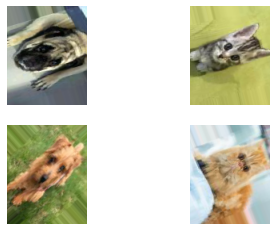

In [58]:
for i in range(4):
    batches = g.next()
    
    #（1,縦サイズ, 横サイズ, チャンネル数)
    print(batches.shape)
    
    # 画像として表示するため、４次元から3次元データにし、配列から画像にする。
    gen_img = array_to_img(batches[0])
 
    plt.subplot(2, 2, i + 1)
    plt.imshow(gen_img)
    plt.axis('off')

plt.show()

In [59]:
# 横サイズ×0.2の範囲で移動する
datagen = ImageDataGenerator(width_shift_range=0.2)

In [60]:
# generatorから9個の画像を生成
# 今回は1枚のみなのでbatch_sizeは1
g = datagen.flow(image_list, batch_size=1)

(1, 125, 100, 3)
(1, 125, 100, 3)
(1, 125, 100, 3)
(1, 125, 100, 3)


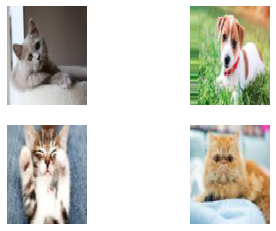

In [62]:
for i in range(4):
    batches = g.next()
    
    #（1,縦サイズ, 横サイズ, チャンネル数)
    print(batches.shape)
    
    # 画像として表示するため、４次元から3次元データにし、配列から画像にする。
    gen_img = array_to_img(batches[0])
 
    plt.subplot(2, 2, i + 1)
    plt.imshow(gen_img)
    plt.axis('off')

plt.show()

albumentationsには雪や雨といった効果を加えることも可能。ImageDataGeneratorは回転や位置をずらすなどできる

## 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。


《アノテーションのためのツール》


アノテーションツールにはLabelImgなどがあります。<br>
https://github.com/tzutalin/labelImg<br>
使い方<br>
https://www.loom.com/share/cfebe6dbea03462fac0da842e5389a7d

## 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。


物体検出の学習を行なうかどうかは任意とします。

参考ドキュメント
https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/

参考ノートブック
https://github.com/albumentations-team/albumentations_examples/blob/master/notebooks/example_bboxes.ipynb

In [6]:
%matplotlib inline

In [7]:

import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [8]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [9]:
image = cv2.imread("data/dog_0.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [12]:
bboxes = [[24, 8, 65, 63]]
category_ids = [18]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {18: 'dog'}

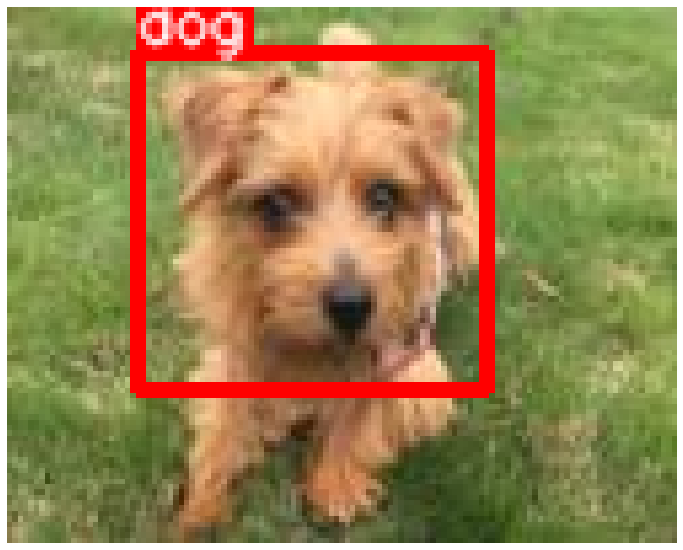

In [13]:
visualize(image, bboxes, category_ids, category_id_to_name)

In [15]:
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

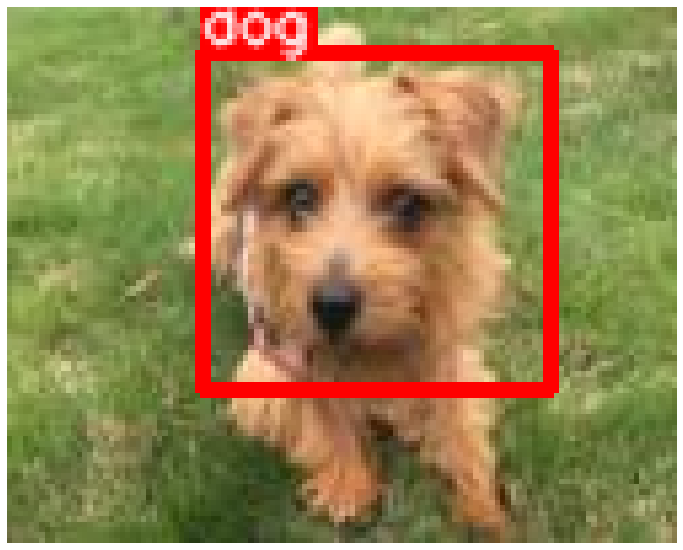

In [16]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

例2

In [17]:
transform = A.Compose(
    [A.ShiftScaleRotate(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

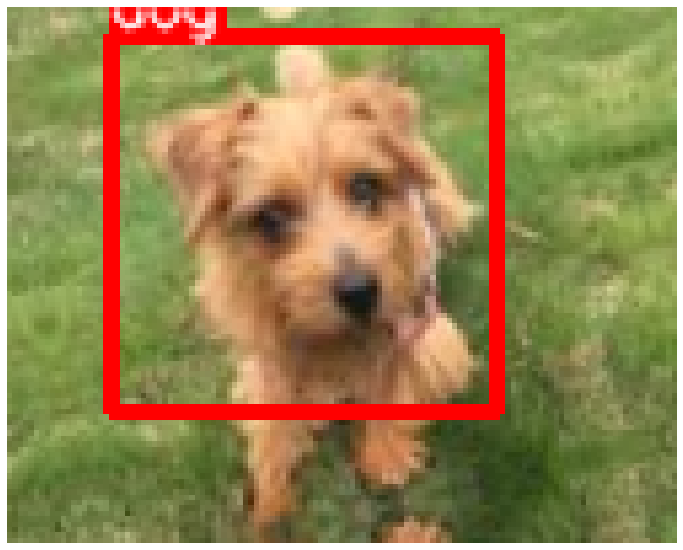

In [18]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [19]:

transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5),
        A.RandomBrightnessContrast(p=0.3),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    ],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

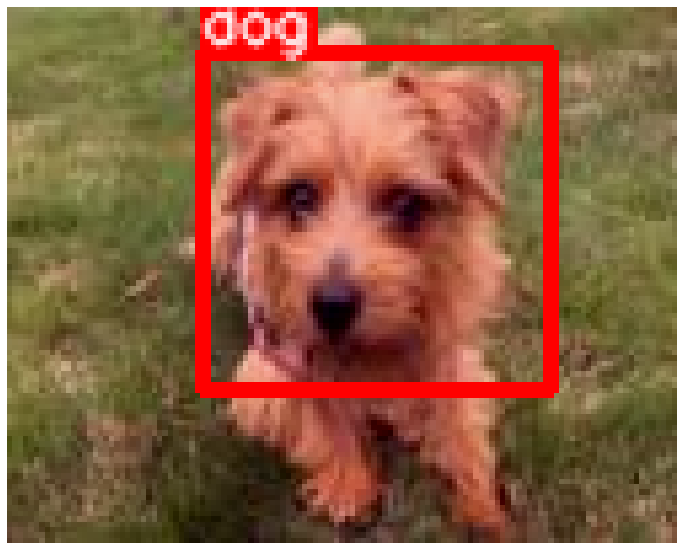

In [20]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)